# Autoreload


In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load from CSV

In [7]:
#Import libraries
import pandas as pd

In [8]:
#Create dataframe with read_csv
df = pd.read_csv('data/spotify_2017.csv')
df

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.9310,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.8130,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.8460,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.4460,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.8110,80.924,288600.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,0.675,0.690,2.0,-4.761,1.0,0.1320,0.2100,0.000000,0.2870,0.2720,137.817,239293.0,4.0
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,0.542,0.859,11.0,-5.651,1.0,0.1970,0.1600,0.004660,0.1370,0.4030,159.797,208053.0,4.0
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,0.731,0.469,5.0,-7.226,1.0,0.0326,0.4630,0.000001,0.1030,0.6310,98.963,165387.0,4.0
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,0.658,0.588,6.0,-4.902,0.0,0.0367,0.1050,0.000001,0.1250,0.4340,110.075,214802.0,4.0


# Load from API

In [ ]:
# Use Lyrics API
https://lyrics.lewagon.ai/search?artist=The%20Beatles&title=Come%20together

In [58]:
import requests

def fetch_lyrics(artists, title):
    """
    Get lyrics from Seeds Lyrics API. Returns empty string if song not found
    """
    url = f'https://lyrics.lewagon.ai/search?artist={artists}&title={title}'
    response = requests.get(url)
    if response.status_code != 200:
        return 'No Lyrics Found'
    data = response.json()
    return data['lyrics']



In [16]:
artists = 'The Beatles'
title = 'Yesterday'
url = f'https://lyrics.lewagon.ai/search?artist={artists}&title={title}'
response = requests.get(url)


In [17]:
response.status_code

200

In [20]:
response.json()['lyrics']

"Yesterday all my troubles seemed so far away.\nNow it looks as though they're here to stay.\nOh, I believe in yesterday.\n\nSuddenly, I'm not half the man I used to be.\nThere's a shadow hanging over me.\nOh, yesterday came suddenly.\n\nWhy she had to go?\nI don't know, she wouldn't say.\nI said something wrong.\nNow I long for yesterday.\n\nYesterday love was such an easy game to play.\nNow I need a place to hide away.\nOh, I believe in yesterday.\n\nWhy she had to go?\nI don't know, she wouldn't say.\nI said something wrong.\nNow I long for yesterday.\n\nYesterday love was such an easy game to play.\nNow I need a place to hide away.\nOh, I believe in yesterday.\n\nMm mm mm mm mm mm mm."

In [21]:
#Check if it works with a known song
fetch_lyrics('The Beatles', 'Come Together')[0:100]

'Here come old flat top\nHe come grooving up slowly\nHe got joo joo eyeball\nHe one holy roller\nHe got h'

In [22]:
# Check if it works with an unknown song
fetch_lyrics('The Beatles', 'Come Together zdxfzdxc')[0:100]

''

## Autoreload 

In [35]:
from lyrics import fetch_lyrics as fl

In [39]:
# fl('The Beatles', 'Come Together')

## Use iterrows and loc to build dataframe

In [59]:
tracks_df = pd.read_csv('data/spotify_2017.csv')
test  = tracks_df[['artists', 'name']].head(3)
test['lyrics'] = None
test 

,artists,name,lyrics
0,Ed Sheeran,Shape of You,None
1,Luis Fonsi,Despacito - Remix,None
2,Luis Fonsi,Despacito (Featuring Daddy Yankee),None


In [60]:
for index, row in  test.iterrows():
    row_lyrics = fetch_lyrics(row['artists'], row['name'])[0:100]
    test.loc[index, 'lyrics'] = row_lyrics
    


    
        

In [61]:
test

,artists,name,lyrics
0,Ed Sheeran,Shape of You,The club isn't the best place to find a lover\...
1,Luis Fonsi,Despacito - Remix,No Lyrics Found
2,Luis Fonsi,Despacito (Featuring Daddy Yankee),No Lyrics Found


# Load from Scraping

In [63]:
import re
import requests
from bs4 import BeautifulSoup



In [65]:
# create response
url = "https://www.imdb.com/list/ls055386972/"
headers={"Accept-Language":"en-US"}

response = requests.get(url, headers)

soup = BeautifulSoup(response.content, "html.parser")




In [72]:
soup_list = soup.find_all("div", class_= "lister-item-content")

title =soup_list[0].find("h3").find("a").string
title

'The Godfather'

In [74]:
movies = []
for movie in soup.find_all("div", class_="lister-item-content"):
    title = movie.find("h3").find("a").string
    duration = int(movie.find(class_="runtime").string.strip(' min'))
    year = int(re.search(r"\d{4}", movie.find(class_="lister-item-year").string).group(0))
    movies.append({'title': title, 'duration': duration, 'year': year})
print(movies)

[{'title': 'The Godfather', 'duration': 175, 'year': 1972}, {'title': "Schindler's List", 'duration': 195, 'year': 1993}, {'title': '12 Angry Men', 'duration': 96, 'year': 1957}, {'title': 'Life Is Beautiful', 'duration': 116, 'year': 1997}, {'title': 'The Good, the Bad and the Ugly', 'duration': 161, 'year': 1966}, {'title': 'The Shawshank Redemption', 'duration': 142, 'year': 1994}, {'title': 'The Pursuit of Happyness', 'duration': 117, 'year': 2006}, {'title': 'Seven Samurai', 'duration': 207, 'year': 1954}, {'title': 'The Intouchables', 'duration': 112, 'year': 2011}, {'title': 'Central do Brasil', 'duration': 110, 'year': 1998}, {'title': 'Requiem for a Dream', 'duration': 102, 'year': 2000}, {'title': 'A Beautiful Mind', 'duration': 135, 'year': 2001}, {'title': "Hachi: A Dog's Tale", 'duration': 93, 'year': 2009}, {'title': 'Taken', 'duration': 90, 'year': 2008}, {'title': 'Yeopgijeogin geunyeo', 'duration': 137, 'year': 2001}, {'title': 'Amores perros', 'duration': 154, 'year':

## Scrape all pages from top 250

In [76]:
def fetch_page(page):
    response = requests.get(
        "https://www.imdb.com/search/title/",
        params={"groups":"top_250", "sort":"user_rating","start": (1 + page * 50)},
        headers={"Accept-Language":"en-US"})
    soup = BeautifulSoup(response.content, "html.parser")
    return soup

In [77]:
def parse_movies(soup):
    movies = []
    for movie in soup.find_all("div", class_="lister-item-content"):
        title = movie.find("h3").find("a").string
        duration = int(movie.find(class_="runtime").string.strip(' min'))
        year = int(re.search(r"\d{4}", movie.find(class_="lister-item-year").string).group(0))
        movies.append({'title': title, 'duration': duration, 'year': year})
    return movies



## Apply both functions

In [78]:
all_movies = []
for page in range(5):
    print(f"Parsing page {page + 1}...")
    soup = fetch_page(page)
    all_movies += parse_movies(soup)
print("Done")

Parsing page 1...
Parsing page 2...
Parsing page 3...
Parsing page 4...
Parsing page 5...
Done


In [82]:
all_movies_df = pd.DataFrame(all_movies)
all_movies_df

,title,duration,year
0,The Shawshank Redemption,142,1994
1,The Godfather,175,1972
2,The Dark Knight,152,2008
3,The Lord of the Rings: The Return of the King,201,2003
4,Schindler's List,195,1993
...,...,...,...
245,Rebecca,130,1940
246,The Grapes of Wrath,129,1940
247,The Wizard of Oz,102,1939
248,Mr. Smith Goes to Washington,129,1939


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

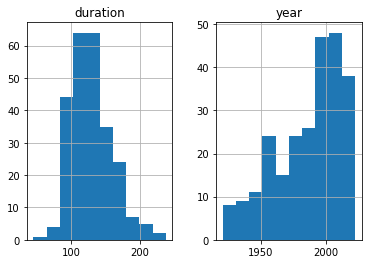

In [83]:
#Apply histograms
all_movies_df.hist()